In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from PIL import Image
import torchvision.transforms as T

from torchvision.utils import make_grid

from torchvision.datasets import KMNIST
from torchvision.models import resnet18
from einops import rearrange
from einops.layers.torch import Rearrange

# Data

Need to add classes

In [6]:
import numpy as np
import dataloaders 
from torch.utils.data import DataLoader
import torch

In [7]:
transforms = T.Compose([
    Rearrange("h w -> () h w"),
    #TODO Normalize with dataset mean and std...
    T.Lambda(lambda x: x.float()/255)
])

In [16]:
train_ds = dataloaders.KMNIST10("data/10", tfms=transforms)
test_ds = dataloaders.KMNIST10("data/10", train=False, tfms=transforms)

train_dl = DataLoader(train_ds, batch_size=32)
test_dl = DataLoader(test_ds, batch_size=32)

Using downloaded and verified file: data/10/kmnist-train-imgs.npz
Using downloaded and verified file: data/10/kmnist-train-labels.npz
Using downloaded and verified file: data/10/kmnist-test-imgs.npz
Using downloaded and verified file: data/10/kmnist-test-labels.npz
Using downloaded and verified file: data/10/kmnist-train-imgs.npz
Using downloaded and verified file: data/10/kmnist-train-labels.npz
Using downloaded and verified file: data/10/kmnist-test-imgs.npz
Using downloaded and verified file: data/10/kmnist-test-labels.npz


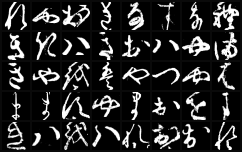

In [17]:
T.ToPILImage()(make_grid(train_ds.data[:40].unsqueeze(1), pad_value=10))

# Model

In [18]:
device = "cuda"

In [19]:
import torch.nn as nn

In [20]:
model = resnet18()
model.conv1 = nn.Conv2d(1,64, kernel_size=(7,7), stride=(1,1), padding=(3,3))
model.fc = nn.Linear(512,10)

In [21]:
model.to(device)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64,

# Loss and Optim

In [22]:
import torch.nn.functional as F
from torch.optim import SGD

In [23]:
lr = 1e-3
opt = SGD(model.parameters(), lr=lr)

In [24]:
loss_fn = F.cross_entropy

# Loop

In [14]:
from tqdm import tqdm
from torch.utils import tensorboard

In [16]:
logger = tensorboard.SummaryWriter()

In [38]:
train_loss = 0

for data in tqdm(train_dl):
    opt.zero_grad()
    x, y = [i.to(device) for i in data]
    y_hat = model(x)
    loss = loss_fn(y_hat, y)
    loss.backward()
    opt.step()
    train_loss += loss.item()

    logger.add_scalar("loss", train_loss)
    logger.close()
    
train_loss /= len(train_ds)


 39%|███▊      | 723/1875 [00:26<00:41, 27.93it/s]

KeyboardInterrupt: 

 39%|███▊      | 723/1875 [00:40<00:41, 27.93it/s]